# Validation

In [1]:
import xarray as xr
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from spei import calculate_pet, monthrange

### Loading dataset

In [2]:
pet_ds = xr.open_mfdataset('./data/spain_dataset/pet/*.nc')
tmp_ds = xr.open_mfdataset('./data/spain_dataset/tmp/*.nc')
pre_ds = xr.open_mfdataset('./data/spain_dataset/pre/*.nc')
spei_ds = xr.open_dataset('~/Downloads/spei06.nc')
spei_ds = spei_ds.sel(time = ((spei_ds.time.dt.year > 1970) & (spei_ds.time.dt.year < 2011)))

## Validation of PET variable

In [3]:
def sample_dataset(ds:xr.Dataset, lat = None, lon = None):
    if lat:
        ds = ds.sel(lat = ((pet_ds.lat > lat[0]) & (pet_ds.lat < lat[1])))
    if lon:
        ds = ds.sel(lon = ((pet_ds.lon > lon[0]) & (pet_ds.lon < lon[1])))
    return ds

def get_it_right(arr, brr):
    mask = np.where(~np.isnan(arr))[0]
    return arr[mask], brr[mask]

### AFR

In [4]:
pet_AFR_ds = sample_dataset(lat = [-26, 29], lon = [21, 29], ds= pet_ds)
tas_AFR_ds = sample_dataset(lat = [-26, 29], lon = [21, 29], ds= tmp_ds)
pre_AFR_ds = sample_dataset(lat = [-26, 29], lon = [21, 29], ds= pre_ds)
spei_AFR_ds = sample_dataset(lat = [-26, 29], lon = [21, 29], ds= spei_ds)

pet_AFR = pet_AFR_ds['pet'].values[0:60]
tas_AFR = tas_AFR_ds['tmp'].values[0:60]
pre_AFR = pre_AFR_ds['pre'].values[0:60]
spei_AFR = spei_AFR_ds['spei'].values[0:60]
lat_AFR = pet_AFR_ds.lat.values
time = pet_AFR_ds.time.values[0:60]
month_range = np.asarray([monthrange(date) for date in time])

In [5]:
pet_AFR_c = calculate_pet(tas_AFR, time, lat=lat_AFR)

Text(0.5, 1.0, 'Self Calculated')

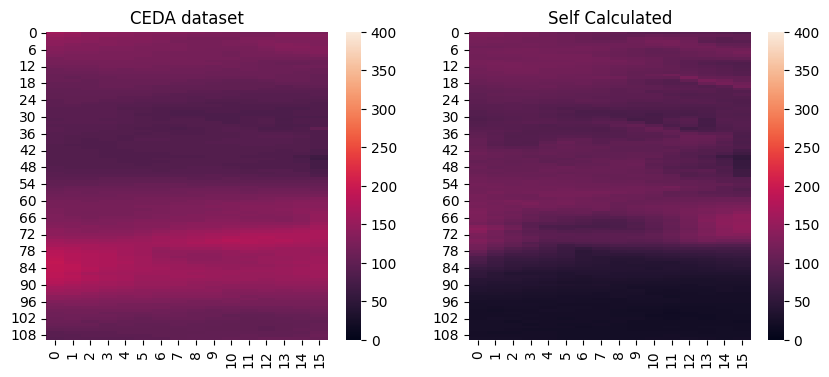

In [6]:
fig, ax = plt.subplots(1,2, figsize = (10,4))
month_index = 13
sns.heatmap(month_range[month_index]*pet_AFR[month_index], vmin=0, vmax=400, ax=ax[0])
sns.heatmap(pet_AFR_c[month_index], vmin=0, vmax=400, ax=ax[1])
ax[0].set_title('CEDA dataset')
ax[1].set_title('Self Calculated')

Text(0.5, 1.0, 'Heatmap of correlation')

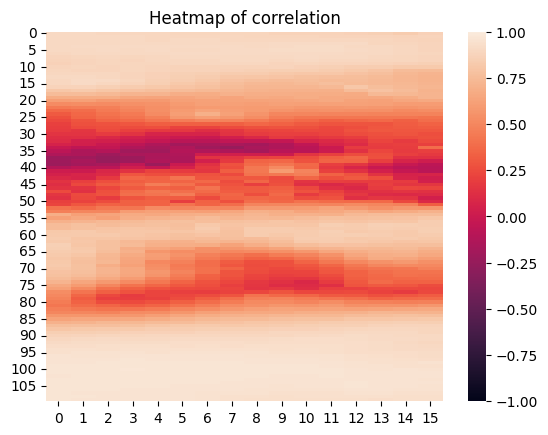

In [7]:
corrcoef = np.ones((pet_AFR.shape[1],pet_AFR.shape[2]))*np.nan

for i in range(pet_AFR.shape[1]):
    for j in range(pet_AFR.shape[2]):
        corrcoef[i,j] = np.corrcoef(*get_it_right(pet_AFR_c[:,i,j], month_range*pet_AFR[:, i,j]))[0,1]

ax = sns.heatmap(corrcoef, vmax=1, vmin=-1)
ax.set_title('Heatmap of correlation')


<Axes: >

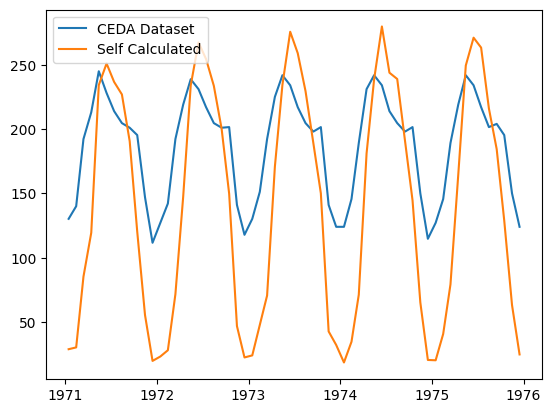

In [8]:
lat_index, lon_index = 90, 10
sns.lineplot(x = time, y=month_range*pet_AFR[:, lat_index, lon_index], label = 'CEDA Dataset')
sns.lineplot(x = time, y=pet_AFR_c[:, lat_index, lon_index], label = 'Self Calculated')

<Axes: >

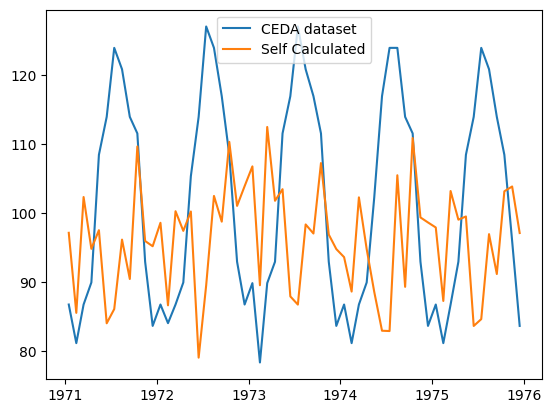

In [9]:
lat_index, lon_index = 35,8
sns.lineplot(x = time, y=month_range*pet_AFR[:, lat_index, lon_index], label = 'CEDA dataset')
sns.lineplot(x = time, y=pet_AFR_c[:, lat_index, lon_index], label = 'Self Calculated')

### NAM

In [10]:
pet_NAM_ds = sample_dataset(lat = [34, 55], lon = [-115, -102], ds= pet_ds)
tas_NAM_ds = sample_dataset(lat = [34, 55], lon = [-115, -102], ds= tmp_ds)
pre_NAM_ds = sample_dataset(lat = [34, 55], lon = [-115, -102], ds= pre_ds)
spei_NAM_ds = sample_dataset(lat = [34, 55], lon = [-115, -102], ds= spei_ds)


pet_NAM = pet_NAM_ds['pet'].values[0:60]
tas_NAM = tas_NAM_ds['tmp'].values[0:60]
pre_NAM = pre_NAM_ds['pre'].values[0:60]
spei_NAM = spei_NAM_ds['spei'].values[0:60]
lat_NAM = pet_NAM_ds.lat.values
time = pet_NAM_ds.time.values[0:60]
month_range = np.asarray([monthrange(date) for date in time])

In [11]:
pet_NAM_c = calculate_pet(tas_NAM, time, lat=lat_NAM)

/home/jogean/Documentos/SPEI/spei/spei.py:178: RuntimeWarning: invalid value encountered in scalar power
  pet[index] = 16 * K[index] * (10 * tas[index] / _I) ** m[index]
/home/jogean/Documentos/SPEI/spei/spei.py:178: RuntimeWarning: invalid value encountered in scalar power
  pet[index] = 16 * K[index] * (10 * tas[index] / _I) ** m[index]
/home/jogean/Documentos/SPEI/spei/spei.py:178: RuntimeWarning: invalid value encountered in scalar power
  pet[index] = 16 * K[index] * (10 * tas[index] / _I) ** m[index]
/home/jogean/Documentos/SPEI/spei/spei.py:178: RuntimeWarning: invalid value encountered in scalar power
  pet[index] = 16 * K[index] * (10 * tas[index] / _I) ** m[index]
/home/jogean/Documentos/SPEI/spei/spei.py:178: RuntimeWarning: invalid value encountered in scalar power
  pet[index] = 16 * K[index] * (10 * tas[index] / _I) ** m[index]
/home/jogean/Documentos/SPEI/spei/spei.py:178: RuntimeWarning: invalid value encountered in scalar power
  pet[index] = 16 * K[index] * (10 * tas

Text(0.5, 1.0, 'Self Calculated')

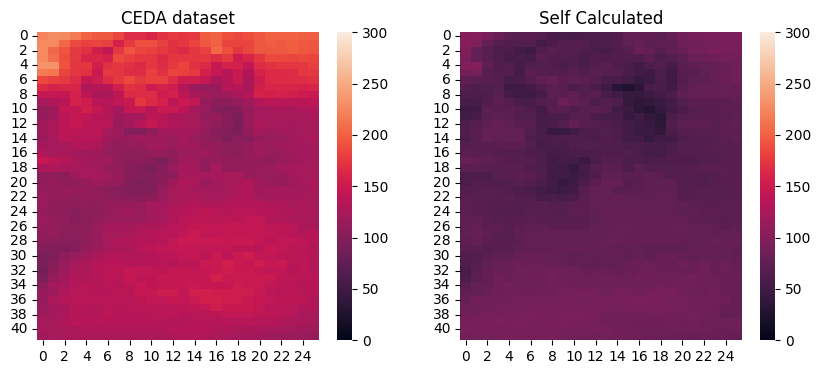

In [12]:
fig, ax = plt.subplots(1,2, figsize = (10,4))
month_index = 4
sns.heatmap(month_range[month_index]*pet_NAM[month_index], vmin=0, vmax=300, ax=ax[0])
sns.heatmap(pet_NAM_c[month_index], vmin=0, vmax=300, ax=ax[1])
ax[0].set_title('CEDA dataset')
ax[1].set_title('Self Calculated')

Text(0.5, 1.0, 'Heatmap of correlation')

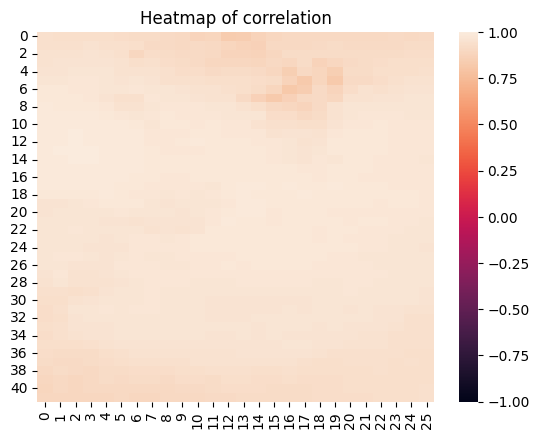

In [14]:
corrcoef = np.ones((pet_NAM.shape[1],pet_NAM.shape[2]))*np.nan

for i in range(pet_NAM.shape[1]):
    for j in range(pet_NAM.shape[2]):
        corrcoef[i,j] = np.corrcoef(*get_it_right(pet_NAM_c[:,i,j], month_range*pet_NAM[:, i,j]))[0,1]

ax = sns.heatmap(corrcoef, vmax=1, vmin=-1)
ax.set_title('Heatmap of correlation')

<Axes: >

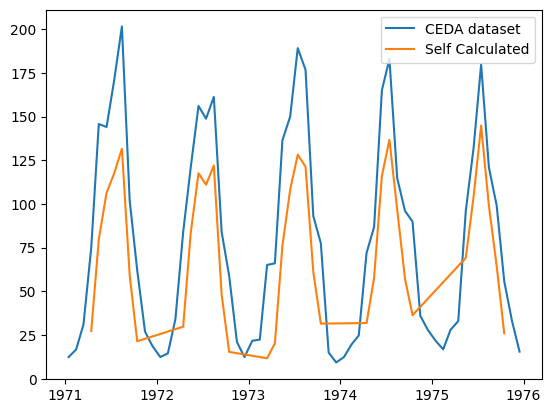

In [15]:
lat_index, lon_index = 30,14
sns.lineplot(x = time, y=month_range*pet_NAM[:, lat_index, lon_index], label = 'CEDA dataset')
sns.lineplot(x = time, y=pet_NAM_c[:, lat_index, lon_index], label = 'Self Calculated')

<Axes: >

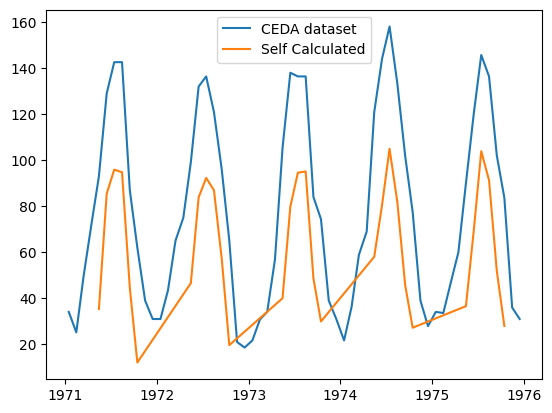

In [16]:
lat_index, lon_index = 12, 18
sns.lineplot(x = time, y=month_range*pet_NAM[:, lat_index, lon_index], label = 'CEDA dataset')
sns.lineplot(x = time, y=pet_NAM_c[:, lat_index, lon_index], label = 'Self Calculated')

## Validation of SPEI

In [17]:
from spei import calculate_spei

### AFR

In [18]:
d_AFR = pre_AFR - ((pet_AFR.T)*month_range).T
d_AFR_c = pre_AFR - pet_AFR_c


Text(0.5, 4.444444444444445, 'N days')

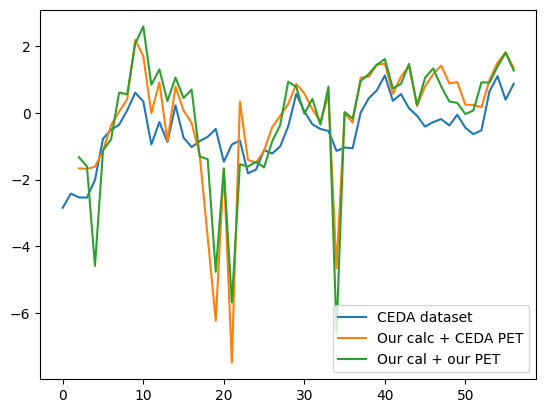

In [22]:
lat_index, lon_index = 60, 14

spei_c = calculate_spei(d_AFR[:, lat_index, lon_index])
spei_cc = calculate_spei(d_AFR_c[:, lat_index, lon_index])

sns.lineplot(spei_AFR[3:, lat_index, lon_index], label = 'CEDA dataset')
sns.lineplot(spei_c[:], label = 'Our calc + CEDA PET')
sns.lineplot(spei_cc[:], label = 'Our cal + our PET')
ax.set_title('SPEI')
ax.set_xlabel('N days')

### NAM

In [20]:
d_NAM = pre_NAM - ((pet_NAM.T)*month_range).T
d_NAM_c = pre_NAM - pet_NAM_c


Text(0.5, 0, 'N days')

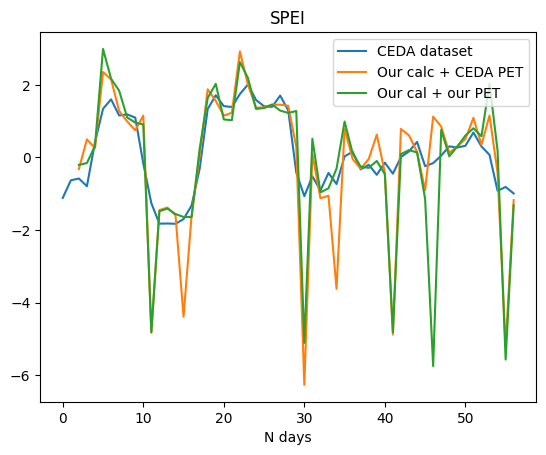

In [23]:
lat_index, lon_index = 0, 3

spei_c = calculate_spei(d_NAM[:, lat_index, lon_index])
spei_cc = calculate_spei(d_NAM_c[:, lat_index, lon_index])

ax = sns.lineplot(spei_NAM[3:, lat_index, lon_index], label = 'CEDA dataset')
sns.lineplot(spei_c[:], label = 'Our calc + CEDA PET')
sns.lineplot(spei_cc[:], label = 'Our cal + our PET')
ax.set_title('SPEI')
ax.set_xlabel('N days')